## Observations and Insights 

In [168]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [21]:
# Checking the number of mice.
mouse_count = merged_df["Mouse ID"].nunique()
pd.DataFrame({"Number of Mice":[mouse_count]})

,Number of Mice
0,249


In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouseDf = merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]
duplicateMouseDf


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmouse_df = merged_df[merged_df["Mouse ID"] != "g989"]



In [24]:
# Checking the number of mice in the clean DataFrame.
another_mouse_count = cleanmouse_df["Mouse ID"].nunique()
pd.DataFrame({"Number of Mice":[another_mouse_count]})

,Number of Mice
0,248


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_gby_df = cleanmouse_df.groupby(['Drug Regimen'])
drugmean = drug_gby_df['Tumor Volume (mm3)'].mean()
drugmedian = drug_gby_df['Tumor Volume (mm3)'].median()
drugvar = drug_gby_df['Tumor Volume (mm3)'].var()
drugstd = drug_gby_df['Tumor Volume (mm3)'].std()
drugsem = drug_gby_df['Tumor Volume (mm3)'].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_summary_df = pd.DataFrame({"Mean of Tumor Volume":drugmean, "Median of Tumor Volume":drugmedian, 
                                "Variance":drugvar, "Standard Deviation":drugstd,"SEM":drugsem})
drug_summary_df


,Mean of Tumor Volume,Median of Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleanmouse_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':["mean","median","var","std","sem"]})

# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

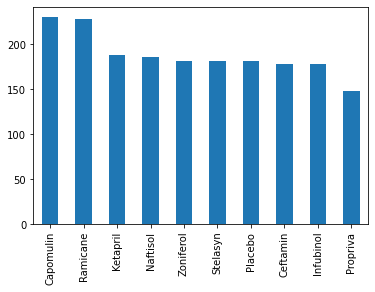

In [30]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count=cleanmouse_df['Drug Regimen'].value_counts()
mouse_count.plot(kind="bar")
plt.show()


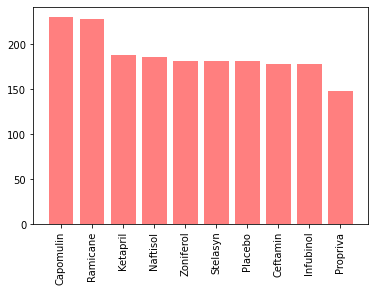

In [34]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mousecounts = cleanmouse_df['Drug Regimen'].value_counts()
plt.bar(mousecounts.index.values, mousecounts.values, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

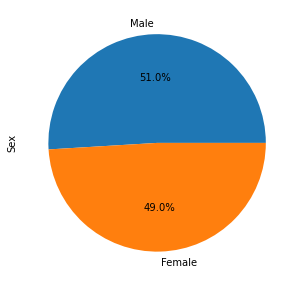

In [189]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = cleanmouse_df['Sex'].value_counts()
mouse_gender.plot(kind="pie",y='Sex',autopct="%1.1f%%", figsize=(5, 5))
plt.show


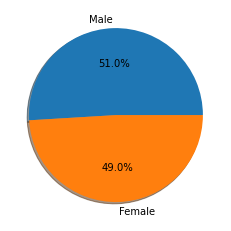

Male      958
Female    922
Name: Sex, dtype: int64

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = cleanmouse_df['Sex'].value_counts()
labels = mouse_gender.index
plt.pie(mouse_gender.values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()
mouse_gender

## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = cleanmouse_df.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor=final_tumor.reset_index()
four_drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse_df = pd.merge(final_tumor,cleanmouse_df, on=["Mouse ID","Timepoint"], how="left")
#merged_mouse_df.head()
merged_mouse_df=merged_mouse_df.loc[merged_mouse_df["Drug Regimen"].isin(four_drugs)]
merged_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [58]:
#merged_mouse_df["Drug Regimen"]

In [165]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#do a for Loop and in the for loop for "i" the treatment list and copy iqr example from class
for drugs in drug_list:
    tumor_vol_data.append(merged_mouse_df['Tumor Volume (mm3)'])
    
tumor_vol_data
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[0      67.973419
 1      65.525743
 3      62.999356
 6      38.407618
 7      43.047543
          ...    
 238    68.594745
 239    31.896238
 240    64.729837
 244    30.638696
 245    62.754451
 Name: Tumor Volume (mm3), Length: 100, dtype: float64,
 0      67.973419
 1      65.525743
 3      62.999356
 6      38.407618
 7      43.047543
          ...    
 238    68.594745
 239    31.896238
 240    64.729837
 244    30.638696
 245    62.754451
 Name: Tumor Volume (mm3), Length: 100, dtype: float64,
 0      67.973419
 1      65.525743
 3      62.999356
 6      38.407618
 7      43.047543
          ...    
 238    68.594745
 239    31.896238
 240    64.729837
 244    30.638696
 245    62.754451
 Name: Tumor Volume (mm3), Length: 100, dtype: float64,
 0      67.973419
 1      65.525743
 3      62.999356
 6      38.407618
 7      43.047543
          ...    
 238    68.594745
 239    31.896238
 240    64.729837
 244    30.638696
 245    62.754451
 Name: Tumor Volume (mm3), Length: 100, 

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

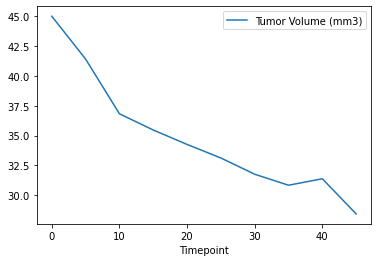

In [126]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
my_mouse_df = cleanmouse_df.loc[cleanmouse_df["Mouse ID"] == "m601", ["Timepoint","Tumor Volume (mm3)"]]
my_mouse_df.plot.line(x='Timepoint',y='Tumor Volume (mm3)')

The correlation between mouse weight and average tumor volume is 0.84


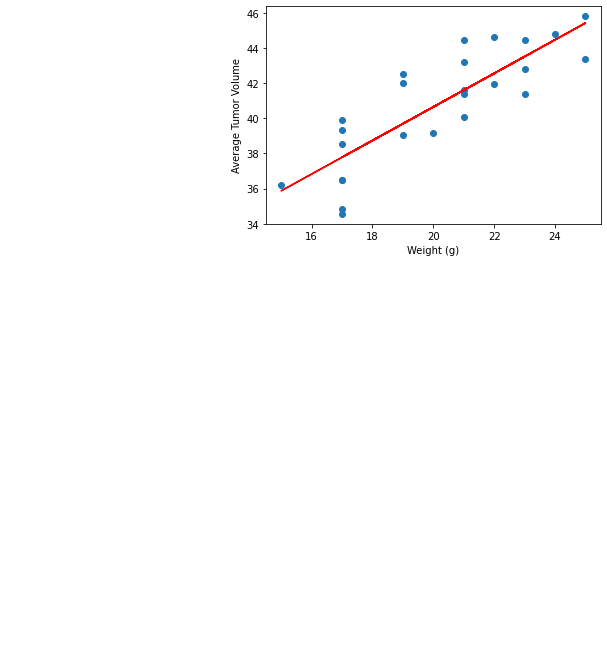

In [172]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
dark_mouse_df = cleanmouse_df.loc[cleanmouse_df["Drug Regimen"] == "Capomulin", ["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
dkmouse_gby_df = dark_mouse_df.groupby(['Mouse ID'])
darkmean_tumor = dkmouse_gby_df['Tumor Volume (mm3)'].mean()
darkmean_weight = dkmouse_gby_df['Weight (g)'].mean()
dark_summary_df = pd.DataFrame({"Average Tumor Volume":darkmean_tumor, "Weight (g)":darkmean_weight})
x_values = dark_summary_df['Weight (g)']
y_values = dark_summary_df['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(darkmean_tumor,darkmean_weight)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
